In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
# Load the datasets
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

In [5]:
# Step 1: Prepare the data
# Merge customers and transactions data
merged_data = transactions.merge(customers, on='CustomerID')

In [7]:
# Aggregating transaction data for each customer
customer_transactions = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'TransactionID': 'count'
}).rename(columns={'TransactionID': 'TransactionCount'}).reset_index()

In [9]:
# Merge aggregated data with customer profile
customer_profile = customers.merge(customer_transactions, on='CustomerID', how='left').fillna(0)


In [11]:
# Selecting relevant features for clustering
features = ['Region', 'TotalValue', 'Quantity', 'TransactionCount']


In [13]:
# Encode categorical column (Region)
customer_profile['Region'] = customer_profile['Region'].astype('category').cat.codes


In [15]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_profile[features])


In [17]:
# Step 2: Perform clustering
# Choosing the number of clusters
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_data)


D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [19]:

# Add cluster labels to the customer profile
customer_profile['Cluster'] = clusters


In [21]:
# Step 3: Calculate clustering metrics
# DB Index
db_index = davies_bouldin_score(scaled_data, clusters)


In [23]:
# Silhouette Score
silhouette_avg = silhouette_score(scaled_data, clusters)


In [25]:
silhouette_avg

0.30170940277112285

In [27]:
# Step 4: Visualize the clusters
# Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
customer_profile['PCA1'] = pca_data[:, 0]
customer_profile['PCA2'] = pca_data[:, 1]

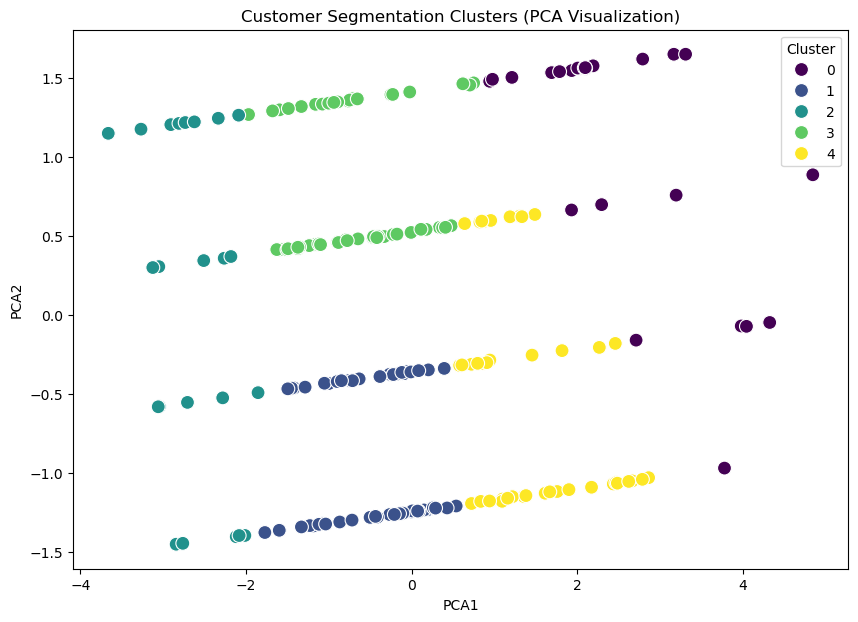

In [29]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=customer_profile, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100
)
plt.title("Customer Segmentation Clusters (PCA Visualization)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(title="Cluster")
plt.show()

In [31]:
# Step 5: Save results
customer_profile.to_csv("Customer_Segmentation.csv", index=False)


In [33]:
# Explanation of Code Steps:
# 1. Merged customer and transaction datasets, aggregated transaction data per customer, and combined it with profile information.
# 2. Selected relevant features and standardized the data for clustering.
# 3. Used KMeans to cluster customers into 5 segments.
# 4. Evaluated the clusters using Davies-Bouldin Index and Silhouette Score for quality assessment.
# 5. Visualized the clusters using PCA to reduce dimensions and display group separations.
# 6. Saved the segmented customer data, including cluster labels, to a CSV file for further analysis.
